# 1 概述

## 1.1 集成算法概述

集成学习（ensemble learning）是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通过在数据上构建多个模型，集成所有模型的建模结果。基本上所有的机器学习领域都可以看到集成学习的身影，在现实中集成学习也有相当大的作用，它可以用来做市场营销模拟的建模，统计客户来源，保留和流失，也可用来预测疾病的风险和病患者的易感性。在现在的各种算法竞赛中，随机森林，梯度提升树（GBDT），Xgboost等集成算法的身影也随处可见，可见其效果之好，应用之广.

#### 集成算法的目标

集成算法会考虑多个评估器的建模结果，汇总之后得到一个综合的结果，**以此来获取比单个模型更好的回归或分类表现**.

多个模型集成成为的模型叫做集成评估器（ensemble estimator），组成集成评估器的每个模型都叫做基评估器（base estimator）。通常来说，有三类集成算法：装袋法（Bagging），提升法（Boosting）和stacking.

装袋法的核心思想是构建多个相互独立的评估器，然后对其预测进行平均或多数表决原则来决定集成评估器的结果。装袋法的代表模型就是随机森林.

提升法中，基评估器是相关的，是按顺序一一构建的。其核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器。提升法的代表模型有Adaboost和梯度提升树。

## 1.2 sklearn中的集成算法

- sklearn中的集成算法模块ensemble

随机森林是非常具有代表性的Bagging集成算法，它的所有基评估器都是决策树，分类树组成的森林就叫做随机森林分类器，回归树所集成的森林就叫做随机森林回归器。这一节主要讲解RandomForestClassifier，随机森林分类器

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from scipy.special import comb
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate,cross_val_score
import warnings
warnings.simplefilter('ignore')

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
clf_dt = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()
clf_dt.fit(X_train,y_train)
clf_rf.fit(X_train,y_train)
score_dt =clf_dt.score(X_test,y_test)
score_rf = clf_rf.score(X_test,y_test)
print(score_dt)
print(score_rf)

0.9777777777777777
0.9777777777777777


In [4]:
score_dt = cross_val_score(DecisionTreeClassifier(),cv=10,X=X_train,y=y_train)

In [5]:
score_rf = cross_val_score(RandomForestClassifier(),cv=10,X=X_train,y=y_train)

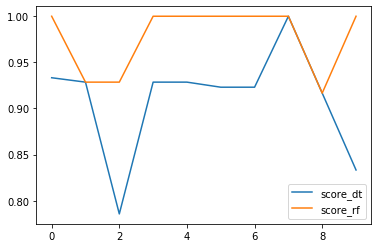

In [6]:
plt.clf()
plt.plot(range(len(score_dt)),score_dt,label='score_dt')
plt.plot(range(len(score_rf)),score_rf,label='score_rf')
plt.legend()
plt.show()

In [7]:
clf_rf.estimators_[:5]

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=714704308, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1426754566, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [8]:
clf_rfc = RandomForestClassifier(oob_score=True)
clf_rfc.fit(X,y)
clf_rfc.oob_score_

0.9438202247191011

In [9]:
clf_rfc.feature_importances_

array([0.09653152, 0.0367419 , 0.0075389 , 0.01077844, 0.08813182,
       0.02314921, 0.17931927, 0.00306487, 0.04097977, 0.19490545,
       0.05358159, 0.07026516, 0.19501212])

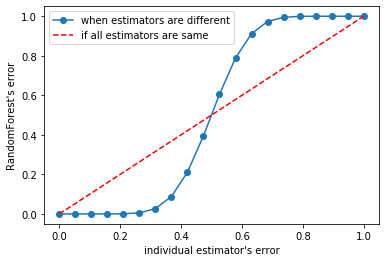

In [10]:
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))for i in range(13,26)]).sum()
    y.append(E)
    
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()


可以从图像上看出，当基分类器的误差率小于0.5，即准确率大于0.5时，集成的效果是比基分类器要好的。相反，当基分类器的误差率大于0.5，袋装的集成算法就失效了。所以在使用随机森林之前，一定要检查，用来组成随机森林的分类树们是否都有至少50%的预测正确率

In [11]:
boston = load_boston()

In [12]:
X,y = boston.data,boston.target
n_samples = X.shape[0]
n_features = X.shape[1]

In [13]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是30%
missing_rate = 0.3
n_missing_sample = int(n_samples * n_features *missing_rate)

In [14]:
missing_features = np.random.randint(0,n_features,n_missing_sample)
missing_samples = np.random.randint(0,n_samples,n_missing_sample)

In [15]:
X_missing = X.copy()
X_missing[missing_features,missing_features] = np.nan

In [16]:
X_missing = pd.DataFrame(X_missing)
X_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,NaN,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,NaN,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,NaN,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


使用随机森林回归填补缺失值

任何回归都是从特征矩阵中学习，然后求解连续型标签y的过程，之所以能够实现这个过程，是因为回归算法认为，特征矩阵和标签之前存在着某种联系。实际上，标签和特征是可以相互转换的，比如说，在一个“用地区，环境，附近学校数量”预测“房价”的问题中，我们既可以用“地区”，“环境”，“附近学校数量”的数据来预测“房价”，也可以反过来，用“环境”，“附近学校数量”和“房价”来预测“地区”。而回归填补缺失值，正是利用了这种思想。对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签组成新的特征矩阵。那对于T来说，它没有缺失的部分，就是我们的Y_test，这部分数据既有标签也有特征，而它缺失的部分，只有特征没有标签，就是我们需要预测的部分。

特征T不缺失的值对应的其他n-1个特征 + 本来的标签：X_train
特征T不缺失的值：Y_train

特征T缺失的值对应的其他n-1个特征 + 本来的标签：X_test
特征T缺失的值：未知，我们需要预测的Y_test

这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。

那如果数据中除了特征T之外，其他特征也有缺失值怎么办？

答案是遍历所有的特征，从缺失最少的开始进行填补（因为填补缺失最少的特征所需要的准确信息最少）。

填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填

补下一个特征。每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。当进行到最后一个特征时（这个特征应该是所有特征中缺失值最多的），已经没有任何的其他特征需要用0来进行填补了，而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。遍历所有的特征后，数据就完整，不再有缺失值.

In [20]:
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
sortindex

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])